<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Bank Customer Churn Prediction</h1>

<a id='table_of_contents'></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Table of Contents</h2>

1. <a href="#import" style="text-decoration: None">Import Libraries and Dataset</a>
2. <a href="#data_preview" style="text-decoration: None">Dataset Preview</a>
3. <a href="#data_wrangling" style="text-decoration: None">Data Wrangling</a>
4. <a href="#eda" style="text-decoration: None">Exploratory Data Analysis</a>
    - <a href="#univariate" style="text-decoration: None">Univariate Analysis</a>
    - <a href="#bivariate" style="text-decoration: None">Bivariate Analysis</a>
5. <a href="#data_preprocessing" style="text-decoration: None">Data Preparation and Preprocessing</a>
6. <a href="#baseline" style="text-decoration: None">Baseline Models</a>
7. <a href="#optimization" style="text-decoration: None">Optimization: Hyperparameter Tuning</a>
8. <a href="#pred_test" style="text-decoration: None">Make Prediction on Test Data</a>

<a id="import"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings("ignore")

In [2]:
class conf:
    index = 'id'
    target = 'Exited'
    random = 42
    folds = 8

np.random.seed(conf.random)

In [3]:
try:
    train_df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
    test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
    submission_df = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
    original_df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
except FileNotFoundError:
    train_df = pd.read_csv('playground-series-s4e1/train.csv')
    test_df = pd.read_csv('playground-series-s4e1/test.csv')
    submission_df = pd.read_csv('playground-series-s4e1/sample_submission.csv')
    original_df = pd.read_csv('bank-customer-churn-prediction/Churn_Modelling.csv')

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [4]:
original_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1.00,1.00,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0.00,1.00,112542.58,0
2,3,15619304,Onio,502,France,Female,42.00,8,159660.80,3,1.00,0.00,113931.57,1
3,4,15701354,Boni,699,France,Female,39.00,1,0.00,2,0.00,0.00,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,NaN,1.00,79084.10,0


In [5]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.00,3,0.00,2,1.00,0.00,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.00,1,0.00,2,1.00,1.00,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.00,10,0.00,2,1.00,0.00,184866.69,0
3,3,15741417,Kao,581,France,Male,34.00,2,148882.54,1,1.00,1.00,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.00,5,0.00,2,1.00,1.00,15068.83,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
original_df['Exited'].unique()

array([1, 0])

In [9]:
train_df['Exited'].unique()

array([0, 1])

In [10]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00
mean,82516.50,15692005.02,656.45,38.13,5.02,55478.09,1.55,0.75,0.50,112574.82,0.21
std,47641.36,71397.82,80.10,8.87,2.81,62817.66,0.55,0.43,0.50,50292.87,0.41
min,0.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,41258.25,15633141.00,597.00,32.00,3.00,0.00,1.00,1.00,0.00,74637.57,0.00
50%,82516.50,15690169.00,659.00,37.00,5.00,0.00,2.00,1.00,0.00,117948.00,0.00
75%,123774.75,15756824.00,710.00,42.00,7.00,119939.52,2.00,1.00,1.00,155152.47,0.00
max,165033.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [11]:
original_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10001.00,10002.00,10002.00,10002.00,10001.00,10001.00,10002.00,10002.00
mean,5001.50,15690933.45,650.56,38.92,5.01,76491.11,1.53,0.71,0.51,100083.33,0.20
std,2887.47,71931.77,96.66,10.49,2.89,62393.47,0.58,0.46,0.50,57508.12,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2501.25,15628524.75,584.00,32.00,3.00,0.00,1.00,0.00,0.00,50983.75,0.00
50%,5001.50,15690732.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100185.24,0.00
75%,7501.75,15753225.50,718.00,44.00,7.00,127647.84,2.00,1.00,1.00,149383.65,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


<a id="data_wrangling"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Drop ID columns</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [12]:
original_df = original_df.drop(columns=['RowNumber', 'CustomerId'], axis=1)
train_df = train_df.drop(columns=['id', 'CustomerId'], axis=1)
test_df = test_df.drop(columns=['id', 'CustomerId'], axis=1)

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Change Column DataType</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [13]:
columns_to_convert = ['HasCrCard', 'IsActiveMember', 'Tenure']

for column in columns_to_convert:
    original_df[column] = train_df[column].astype('int').astype('object')
    train_df[column] = train_df[column].astype('int').astype('object')
    test_df[column] = test_df[column].astype('int').astype('object')

<a id=""></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Drop NaNs</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [14]:
train_df = train_df.dropna()

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.3. Merge Data</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [15]:
# assert sorted(original_df.columns) == sorted(train_df.columns)

In [16]:
# combined_train_df = train_df.copy()

In [17]:
# combined_train_df = pd.concat([train_df, original_df], axis=0)
# combined_train_df = combined_train_df.drop_duplicates()
# combined_train_df = combined_train_df.reset_index(drop=True)

In [18]:
# combined_train_df.describe()

**Original data has no significant effect (worse)**

<a id="eda"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [19]:
# from fasteda import fast_eda
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_style("darkgrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

In [21]:
plot_color = ['#FF6F61', '#008080']
sns.set_palette(['#008080', 'black'])

In [22]:
!pip install -U kaleido

In [23]:
def custom_barplot(df: pd.DataFrame, column: str, titles: list, labels: dict) -> go.Figure:
    """create a barplot for visualizing a column distribution and 
       its relationship between the target column 
       
       df: the data from which we intend to create the plot -> pandas DataFrame
       
       column: the x-axis column name -> str
       
       titles: A list of the plot and x-axis title respectively -> list
       
       label: a mapping of the x-label and y-label -> dict
    """
    data = pd.crosstab(train_df[column], train_df['Exited'])
    data_normalized = data.div(data.sum(1).astype('float'), axis=0).sort_values(by=0)

    fig = px.bar(data_normalized,
                 x=data_normalized.index,
                 y=[0, 1],
                 color_discrete_sequence=plot_color,
                 title=titles[0],
                 labels=labels,
                 width=800,
                 height=500)

    fig.update_layout(xaxis_title=titles[1],
                      yaxis_title='',
                      legend_title='Customer Churn?',
                      title_x=0.5)

    return fig

<a id="univariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.1. Univariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

**Exited**

In [24]:
exited_count = train_df['Exited'].value_counts()
exited_count

Exited
0    130113
1     34921
Name: count, dtype: int64

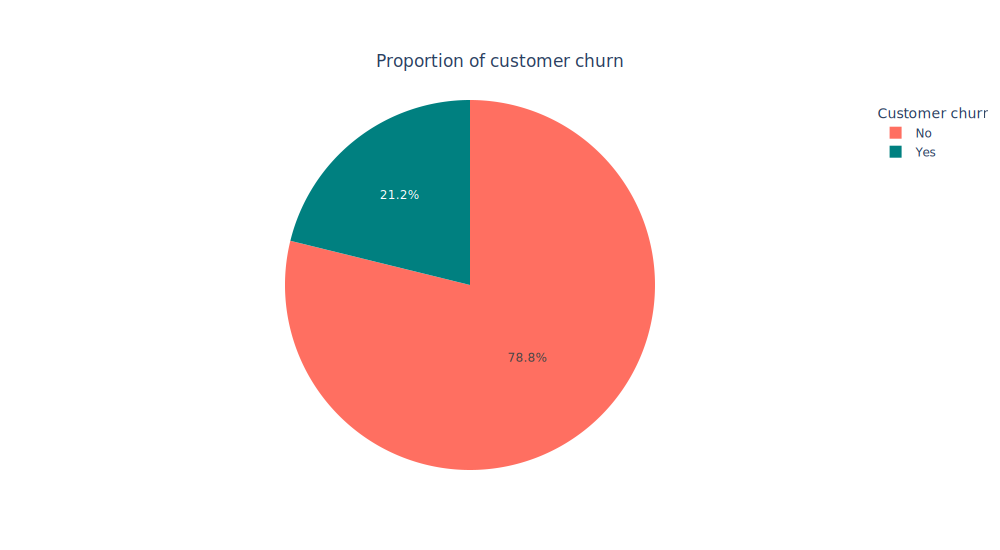

In [25]:
fig = px.pie(
    exited_count, values=exited_count.values, names=['No', 'Yes'],
    title='Proportion of customer churn',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Customer churn?', title_x=0.3, title_y=0.95,)
custom_show(fig)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4.2. Bivariate Analysis</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

**Age**

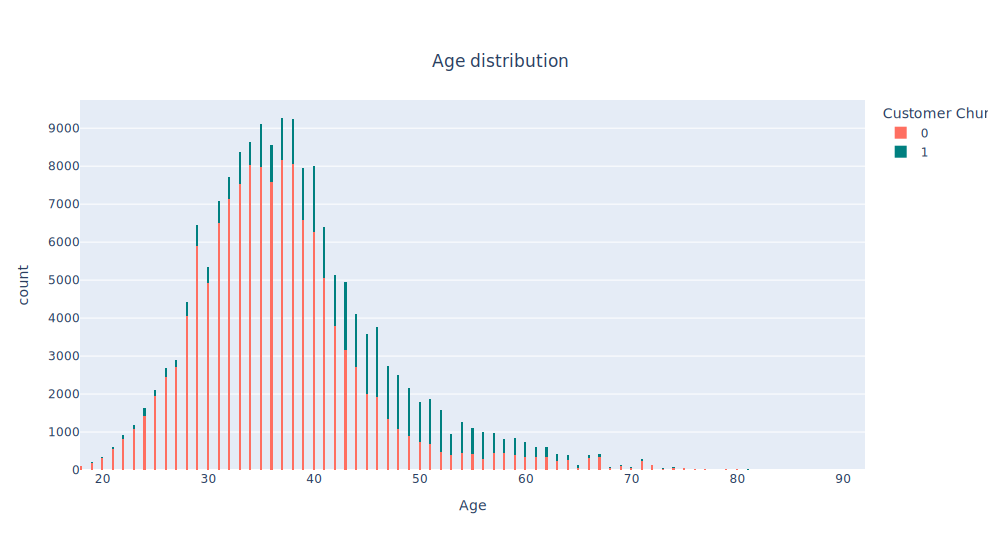

In [26]:
fig = px.histogram(train_df, x='Age', color='Exited', title='Age distribution', color_discrete_sequence=plot_color)
fig.update_layout(title_x=0.5, title_y=0.9, legend_title='Customer Churn')
custom_show(fig)

**Gender**

In [27]:
train_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

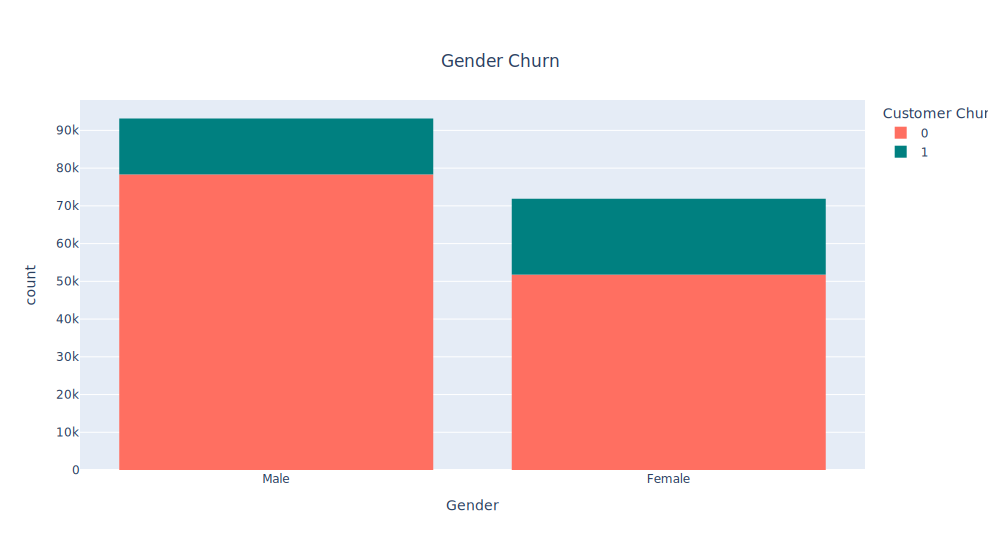

In [28]:
fig = px.histogram(train_df, x='Gender', color='Exited', 
                   color_discrete_sequence=plot_color,
                   title="Gender Churn", width=700, height=500)
fig.update_layout(title_x=0.5, legend_title='Customer Churn')
custom_show(fig)

**Tenure**

In [29]:
train_df['Tenure'].unique()

array([3, 1, 10, 2, 5, 4, 8, 6, 9, 7, 0], dtype=object)

In [30]:
titles = ['Proportion of customer churn by tenure', 'Tenure']
labels={'index': 'Tenure', 'value': 'Proportion'}

custom_barplot(train_df, 'Tenure', titles, labels)

There appears to be no correlation between `tenure` and `customer churn`. This column is best one-hot-encoded rather than ordinal encoded.

**NumOfProducts**

In [31]:
titles = ['Proportion of customer churn by number of products', 'NumOfProducts']
labels={'index': 'Number of Products', 'value': 'Proportion'}

custom_barplot(train_df, 'NumOfProducts', titles, labels)

There appears to be no correlation between `tenure` and `number of products`. Also, this column is best one-hot-encoded rather than ordinal encoded.

<a id="data_preprocessing"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5. Data Preparation and Preprocessing</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.1. Ordinal Encode Gender Column</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [33]:
mapping = {'Male': 0, 'Female': 1}

In [34]:
train_df['Gender'] = train_df['Gender'].map(mapping)
test_df['Gender'] = test_df['Gender'].map(mapping)

<a id="bivariate"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">5.2. Data Preprocessing Pipeline</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [35]:
X_train = train_df.drop(columns=['Exited'], axis=1)
y_train = train_df['Exited']

In [36]:
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()
cat_cols = X_train.select_dtypes(exclude=np.number).columns.to_list()

print(num_cols, end='\n\n')
print(cat_cols)

['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

['Surname', 'Geography', 'Tenure', 'HasCrCard', 'IsActiveMember']


In [37]:
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('one_hot_enc', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [38]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols),
    ],
    remainder='drop',
    n_jobs=-1
)

In [39]:
set_config(display='diagram')
display(col_trans)

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['CreditScore', 'Gender', 'Age', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Surname', 'Geography', 'Tenure', 'HasCrCard',
                                  'IsActiveMember'])])

In [40]:
col_trans.fit(X_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['CreditScore', 'Gender', 'Age', 'Balance',
                                  'NumOfProducts', 'EstimatedSalary']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('one_hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Surname', 'Geography', 'Tenure', 'HasCrCard',
                                  'IsActiveMember'])])

In [41]:
X_train = col_trans.transform(X_train)
X_test = col_trans.transform(test_df)

assert X_train.shape[1] == X_test.shape[1]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [42]:
X_train.shape, y_train.shape

((165034, 2821), (165034,))

<a id="baseline"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">6. Baseline Models</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [43]:
from sklearn import model_selection
from sklearn.metrics import roc_auc_score, log_loss
from lightgbm import LGBMClassifier

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



In [44]:
lgbm_clf = LGBMClassifier(n_jobs=-1, random_state=42)

In [45]:
cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = model_selection.cross_val_score(lgbm_clf, X_train, y_train, scoring='roc_auc', cv=cv)

# Print the roc auc score across folds
print('ROC AUC Score:', scores.mean()) 

ROC AUC Score: 0.892885755117593


<a id="optimization"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7. Optimization: Hyperparameter Tuning</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [46]:
import time

import optuna
import lightgbm as lgb

In [47]:
X = X_train.copy()
y = y_train.copy()

<a id="bayes_optimization"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Define some helper functions</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [48]:
def fit_lightgbm_model(X: pd.DataFrame, y: np.ndarray, n_jobs: int=4, **lightgbm_kwargs) -> LGBMClassifier:
    """Fit a LightGBM model on the training data."""
    model = LGBMClassifier(n_jobs=n_jobs, subsample_freq=1, random_state=0, **lightgbm_kwargs)
    model.fit(X, y)
    
    return model

In [49]:
def fit_and_test(X: pd.DataFrame, y: np.ndarray, train_index: np.ndarray, test_index: np.ndarray, n_jobs: int=4, **lightgbm_kwargs) -> float:
    '''Compute the holdout ROC-AUC score for a LightGBM model with the given hyperparameters.'''
    X_train, X_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]

    # Train model
    model = fit_lightgbm_model(X_train, y_train, n_jobs=n_jobs, **lightgbm_kwargs)

    # Obtain predictions on the validation set and compute ROC-AUC
    y_pred = model.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, y_pred)

    return score

<a id="bayes_optimization"></a>
<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">7.1. Bayesian Optimization with Gaussian Process</h4>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [50]:
def objective(trial):
    """5-fold cross-validation objective function for Optuna to optimize."""
    lightgbm_kwargs = dict(
        learning_rate=trial.suggest_float('learning_rate', 1e-3, 0.75, log=True),
        n_estimators=trial.suggest_int('n_estimators', 50, 1500, log=True),
        num_leaves=trial.suggest_int('num_leaves', 8, 256, log=True),
        max_depth=trial.suggest_int('max_depth', 5, 15, log=True),
        reg_alpha=trial.suggest_float('reg_alpha', 1e-8, 1e1, log=True),
        reg_lambda=trial.suggest_float('reg_lambda', 1e-8, 1e1, log=True),
        min_split_gain=trial.suggest_float('min_split_gain', 1e-8, 100, log=True),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.1, 1.0),
        colsample_bynode=trial.suggest_float('colsample_bynode', 0.1, 1.0),
        subsample=trial.suggest_float("subsample", 0.5, 1),
        scale_pos_weight=trial.suggest_float("scale_pos_weight", 1, 5, log=True)
    )
    
    # 5-fold cross-validation
    cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = [fit_and_test(X, y, train_index, test_index, **lightgbm_kwargs) for train_index, test_index in cv.split(X, y)]

    trial.set_user_attr('holdout_auc', scores)

    return np.mean(scores)

In [51]:
study = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.CRITICAL)
study.optimize(objective, n_trials=100, show_progress_bar=True)

print(f'Best score: {study.best_value:.5f}')
print(f'Best parameters: {study.best_params}')

[I 2024-01-15 01:26:35,570] A new study created in memory with name: no-name-2b54d3ec-2f0e-40bc-a855-ac5dbdca1cba


  0%|          | 0/100 [00:00<?, ?it/s]

Best score: 0.89453
Best parameters: {'learning_rate': 0.02515117550454608, 'n_estimators': 943, 'num_leaves': 50, 'max_depth': 15, 'reg_alpha': 0.0024686038028119655, 'reg_lambda': 2.2383495590388987, 'min_split_gain': 1.3553921363807235, 'colsample_bytree': 0.5756601561638635, 'colsample_bynode': 0.6171011194250022, 'subsample': 0.817495123061696, 'scale_pos_weight': 2.2012893870620776}


In [52]:
# Print the best parameters
print('Best parameters', study.best_params)

Best parameters {'learning_rate': 0.02515117550454608, 'n_estimators': 943, 'num_leaves': 50, 'max_depth': 15, 'reg_alpha': 0.0024686038028119655, 'reg_lambda': 2.2383495590388987, 'min_split_gain': 1.3553921363807235, 'colsample_bytree': 0.5756601561638635, 'colsample_bynode': 0.6171011194250022, 'subsample': 0.817495123061696, 'scale_pos_weight': 2.2012893870620776}


In [53]:
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

lgb = LGBMClassifier(**study.best_params, verbose=-1, random_state=42)
scores = model_selection.cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=cv)

# Print the roc auc score across folds
print('ROC AUC Score:', scores.mean())

ROC AUC Score: 0.8943760788536252


In [54]:
lgb = LGBMClassifier(**study.best_params, verbose=-1, random_state=42)

<a id="pred_test"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">8. Make Prediction on Test Data</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [55]:
lgb.fit(X, y)

LGBMClassifier(colsample_bynode=0.6171011194250022,
               colsample_bytree=0.5756601561638635,
               learning_rate=0.02515117550454608, max_depth=15,
               min_split_gain=1.3553921363807235, n_estimators=943,
               num_leaves=50, random_state=42, reg_alpha=0.0024686038028119655,
               reg_lambda=2.2383495590388987,
               scale_pos_weight=2.2012893870620776, subsample=0.817495123061696,
               verbose=-1)

In [56]:
lgb.predict_proba(X_test)[:, 1]

array([0.04444559, 0.90139468, 0.05369235, ..., 0.04098764, 0.28857538,
       0.34419523])

In [57]:
preds = lgb.predict_proba(X_test)[:, 1]
preds[:10]

array([0.04444559, 0.90139468, 0.05369235, 0.40703981, 0.5760884 ,
       0.10763285, 0.07097314, 0.18676406, 0.7681955 , 0.02000725])

In [58]:
submission_df.head()

,id,Exited
0,165034,0.50
1,165035,0.50
2,165036,0.50
3,165037,0.50
4,165038,0.50


In [59]:
submission_df['Exited'] = preds

submission_df.to_csv('submission.csv', index=None)

In [60]:
submission_df.head()

,id,Exited
0,165034,0.04
1,165035,0.90
2,165036,0.05
3,165037,0.41
4,165038,0.58


In [61]:
submission_df.shape

(110023, 2)